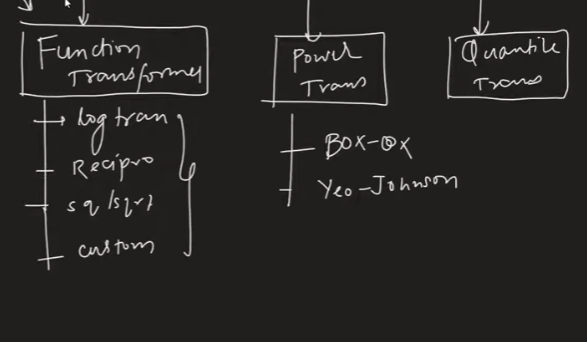

### The end goal of the transformation is to have normal distributions for the features

## Function Transformers

##### How to find if data is normal ? -- QQPlot is one of the best methods 

### Log Transformer
- generally used on right skewed data, it becomes normal distribution

### Reciprocal Transformer uses 1/x

### Sq Transformer uses X^2 
- is generally used on left skewed data

### Sqrt Transformer 

---------------------------------------------------------------------------------------------------------------------

In [109]:
import pandas as pd
import numpy as np
import scipy.stats as probplot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [110]:
df= pd.read_csv(r"C:\Users\hp\OneDrive\codes\python\Learn_ML\1. Datasets\train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [111]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [112]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [113]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [115]:
X = df.iloc[:,1:3]
Y = df.iloc[:,0]

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

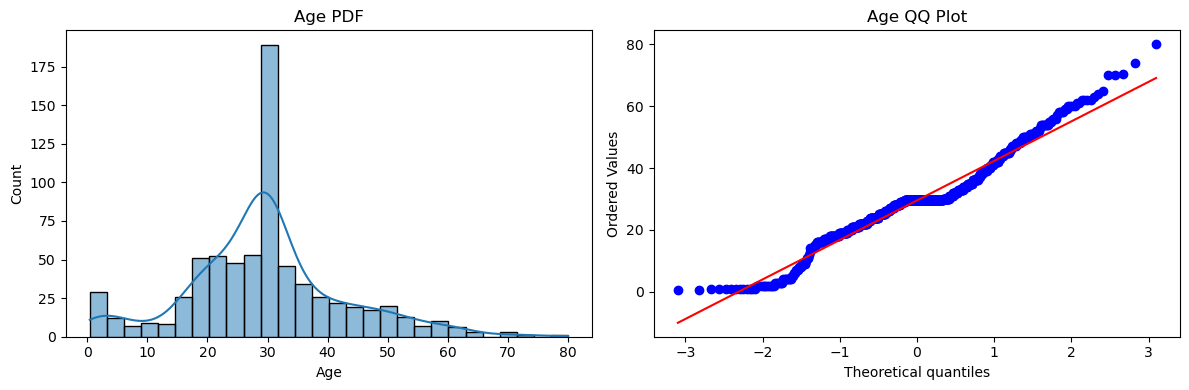

In [117]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))

sns.histplot(X_train["Age"],kde=True,ax=ax1)
ax1.set_title("Age PDF")

stats.probplot(X_train["Age"],dist="norm",plot=ax2)
ax2.set_title("Age QQ Plot")

plt.tight_layout()
plt.show()

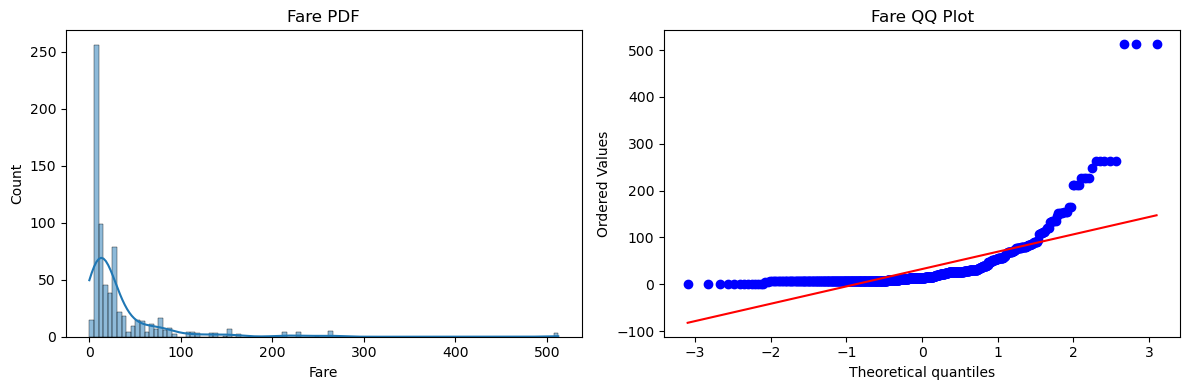

In [118]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))

sns.histplot(X_train["Fare"],kde=True,ax=ax1)
ax1.set_title("Fare PDF")

stats.probplot(X_train["Fare"],dist="norm",plot=ax2)
ax2.set_title("Fare QQ Plot")

plt.tight_layout()
plt.show()

In [119]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [120]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)


y_pred = clf.predict(X_test)
y_pred_1 = clf1.predict(X_test)

print("accuracy_score logistic Regression",accuracy_score(y_test,y_pred))
print("accuracy_score Decision Tree",accuracy_score(y_test,y_pred_1))


accuracy_score logistic Regression 0.6480446927374302
accuracy_score Decision Tree 0.6759776536312849


#### After Funtional Transformers

In [121]:
trf = FunctionTransformer(func=np.log1p)

In [122]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [123]:
clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)


y_pred = clf.predict(X_test_transformed)
y_pred_1 = clf1.predict(X_test_transformed)

print("accuracy_score logistic Regression",accuracy_score(y_test,y_pred))
print("accuracy_score Decision Tree",accuracy_score(y_test,y_pred_1))


accuracy_score logistic Regression 0.6815642458100558
accuracy_score Decision Tree 0.6815642458100558


In [124]:
X_transformed = trf.fit_transform(X)
print("LR",np.mean(cross_val_score(clf,X_transformed,Y,scoring = "accuracy",cv=10)))
print("DC",np.mean(cross_val_score(clf1,X_transformed,Y,scoring = "accuracy",cv=10)))

LR 0.678027465667915
DC 0.6554806491885143


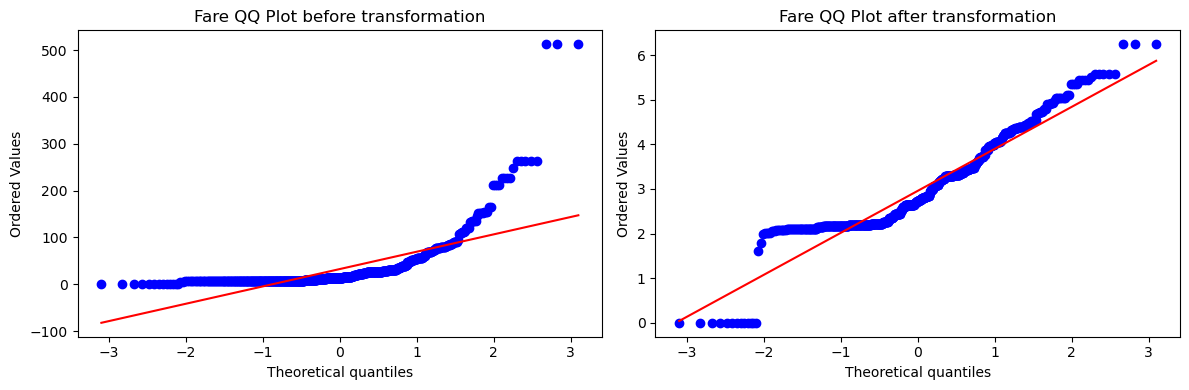

In [125]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))

stats.probplot(X_train["Fare"],dist="norm",plot=ax1)
ax1.set_title("Fare QQ Plot before transformation")

stats.probplot(X_train_transformed["Fare"],dist="norm",plot=ax2)
ax2.set_title("Fare QQ Plot after transformation")

plt.tight_layout()
plt.show()

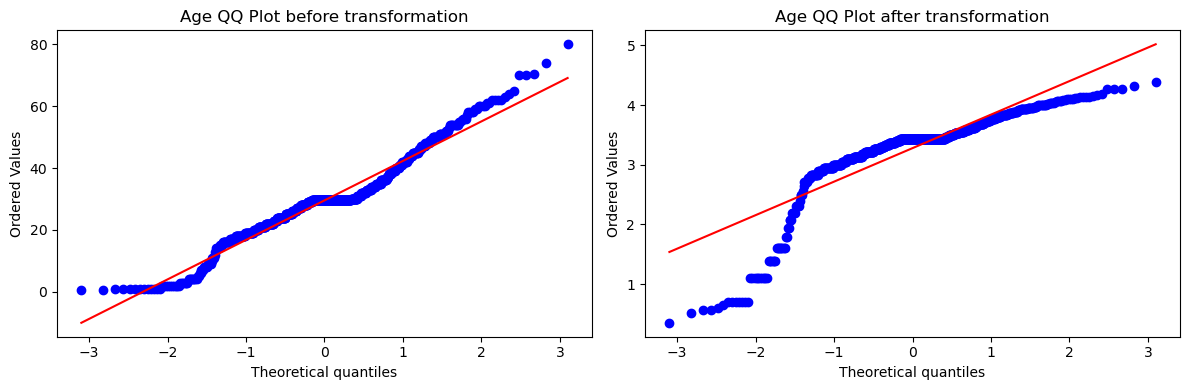

In [139]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))

stats.probplot(X_train["Age"],dist="norm",plot=ax1)
ax1.set_title("Age QQ Plot before transformation")

stats.probplot(X_train_transformed["Age"],dist="norm",plot=ax2)
ax2.set_title("Age QQ Plot after transformation")

plt.tight_layout()
plt.show()

#### As we see the output for age column has messed up after transformation so we use column transformer on only fare column

In [133]:
trf2 = ColumnTransformer([
    ("log",FunctionTransformer(func=np.log1p),["Fare"])
],remainder="passthrough")

X_train_transformed_2 = trf2.fit_transform(X_train)
X_test_transformed_2 = trf2.fit_transform(X_test)


In [134]:
clf.fit(X_train_transformed_2,y_train)
clf1.fit(X_train_transformed_2,y_train)


y_pred = clf.predict(X_test_transformed_2)
y_pred_1 = clf1.predict(X_test_transformed_2)

print("accuracy_score logistic Regression",accuracy_score(y_test,y_pred))
print("accuracy_score Decision Tree",accuracy_score(y_test,y_pred_1))

accuracy_score logistic Regression 0.6703910614525139
accuracy_score Decision Tree 0.659217877094972


In [135]:
X_transformed_2 = trf2.fit_transform(X)
print("LR",np.mean(cross_val_score(clf,X_transformed_2,Y,scoring = "accuracy",cv=10)))
print("DC",np.mean(cross_val_score(clf1,X_transformed_2,Y,scoring = "accuracy",cv=10)))

LR 0.6712609238451936
DC 0.6565917602996254


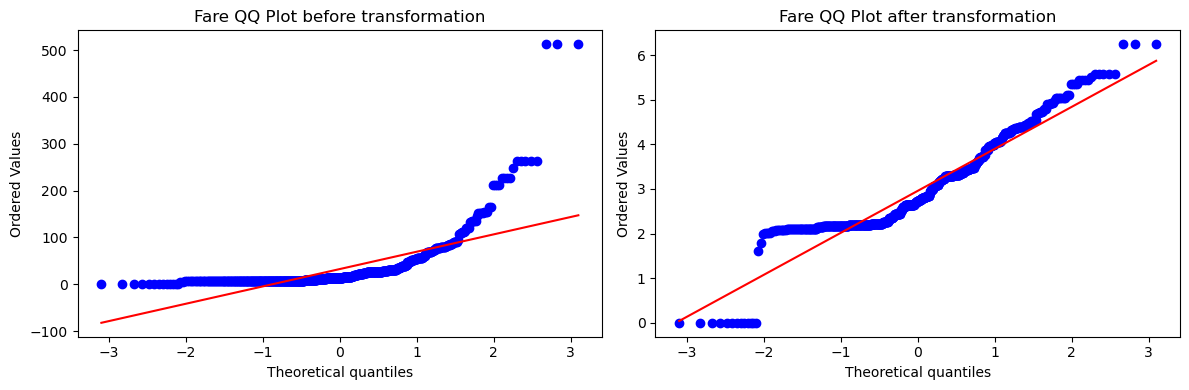

In [140]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))

stats.probplot(X_train["Fare"],dist="norm",plot=ax1)
ax1.set_title("Fare QQ Plot before transformation")

stats.probplot(X_train_transformed_2[:,0],dist="norm",plot=ax2) # here after applying column transformer we had a numpy array so used index
ax2.set_title("Fare QQ Plot after transformation")

plt.tight_layout()
plt.show()